## Mini Project III

In [1]:
import pandas as pd
import numpy as np
# import visualize
import matplotlib.pyplot as plt
import seaborn as sns
# import Kmeans from sklearn
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# import DBSCAN
from sklearn.cluster import DBSCAN
# Aglomerative clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
# Cluster hierarchy
import scipy.cluster.hierarchy as sch
from scipy import stats

### Do they have savings account? How much do they save?

In [2]:
saving_accounts = pd.read_csv("D:\Python(New)\Project\Project_Week_5\Mini_Project_Week_5\clean\saving_accounts.csv").drop(columns = ['acct_start_date','acct_end_date'])
saving_transactions = pd.read_csv("D:\Python(New)\Project\Project_Week_5\Mini_Project_Week_5\clean\saving_transactions.csv")

In [3]:
saving_accounts['saving_amt'] = saving_accounts['ending_balance'] - saving_accounts['starting_balance']

In [4]:
saving_accounts

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,starting_balance,ending_balance,saving_amt
0,1363160,13631603,100,BS,Y,113.04,122.54,9.50
1,1362487,13624873,500,MM,N,651.73,12.89,-638.84
2,1362548,13625483,100,BS,Y,250.24,254.02,3.78
3,1362752,13627523,100,BS,Y,600.26,609.33,9.07
4,1363017,13630173,100,BS,N,2011.02,2901.35,890.33
...,...,...,...,...,...,...,...,...
416,1363141,13631413,100,BS,Y,177.33,528.57,351.24
417,1363038,13630383,100,BS,Y,333.53,508.26,174.73
418,1362529,13625293,100,BS,Y,662.06,873.14,211.08
419,1362895,13628953,100,BS,Y,169.96,96.25,-73.71


In [5]:
saving_accounts['account_active'] = saving_accounts['account_active'].replace({'Y':1,'N':0})

In [16]:
cluster_data = saving_accounts[['acct_type','minimum_balance', 'starting_balance', 'ending_balance', 'saving_amt','account_active']]

In [17]:
cluster_data

,acct_type,minimum_balance,starting_balance,ending_balance,saving_amt,account_active
0,BS,100,113.04,122.54,9.50,1
1,MM,500,651.73,12.89,-638.84,0
2,BS,100,250.24,254.02,3.78,1
3,BS,100,600.26,609.33,9.07,1
4,BS,100,2011.02,2901.35,890.33,0
...,...,...,...,...,...,...
416,BS,100,177.33,528.57,351.24,1
417,BS,100,333.53,508.26,174.73,1
418,BS,100,662.06,873.14,211.08,1
419,BS,100,169.96,96.25,-73.71,1


In [18]:
# scale data
cluster_data.dropna(inplace = True)
cols = ['minimum_balance', 'starting_balance', 'ending_balance', 'saving_amt', 'account_active']
cols_scaled = ['minimum_balance_scaled', 'starting_balance_scaled', 'ending_balance_scaled','saving_amt_scaled','account_active_scaled']
scaler = StandardScaler()
cluster_data[cols_scaled] = scaler.fit_transform(cluster_data[cols])
cluster_data.head()

C:\Users\quang\AppData\Local\Temp\ipykernel_9800\975170550.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data.dropna(inplace = True)
C:\Users\quang\AppData\Local\Temp\ipykernel_9800\975170550.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data[cols_scaled] = scaler.fit_transform(cluster_data[cols])


,acct_type,minimum_balance,starting_balance,ending_balance,saving_amt,account_active,minimum_balance_scaled,starting_balance_scaled,ending_balance_scaled,saving_amt_scaled,account_active_scaled
0,BS,100,113.04,122.54,9.50,1,-0.554485,-0.447081,-0.553308,-0.349709,0.350238
1,MM,500,651.73,12.89,-638.84,0,1.803476,-0.130614,-0.606738,-0.955130,-2.855201
2,BS,100,250.24,254.02,3.78,1,-0.554485,-0.366479,-0.489242,-0.355050,0.350238
3,BS,100,600.26,609.33,9.07,1,-0.554485,-0.160851,-0.316109,-0.350110,0.350238
4,BS,100,2011.02,2901.35,890.33,0,-0.554485,0.667935,0.800730,0.472812,-2.855201


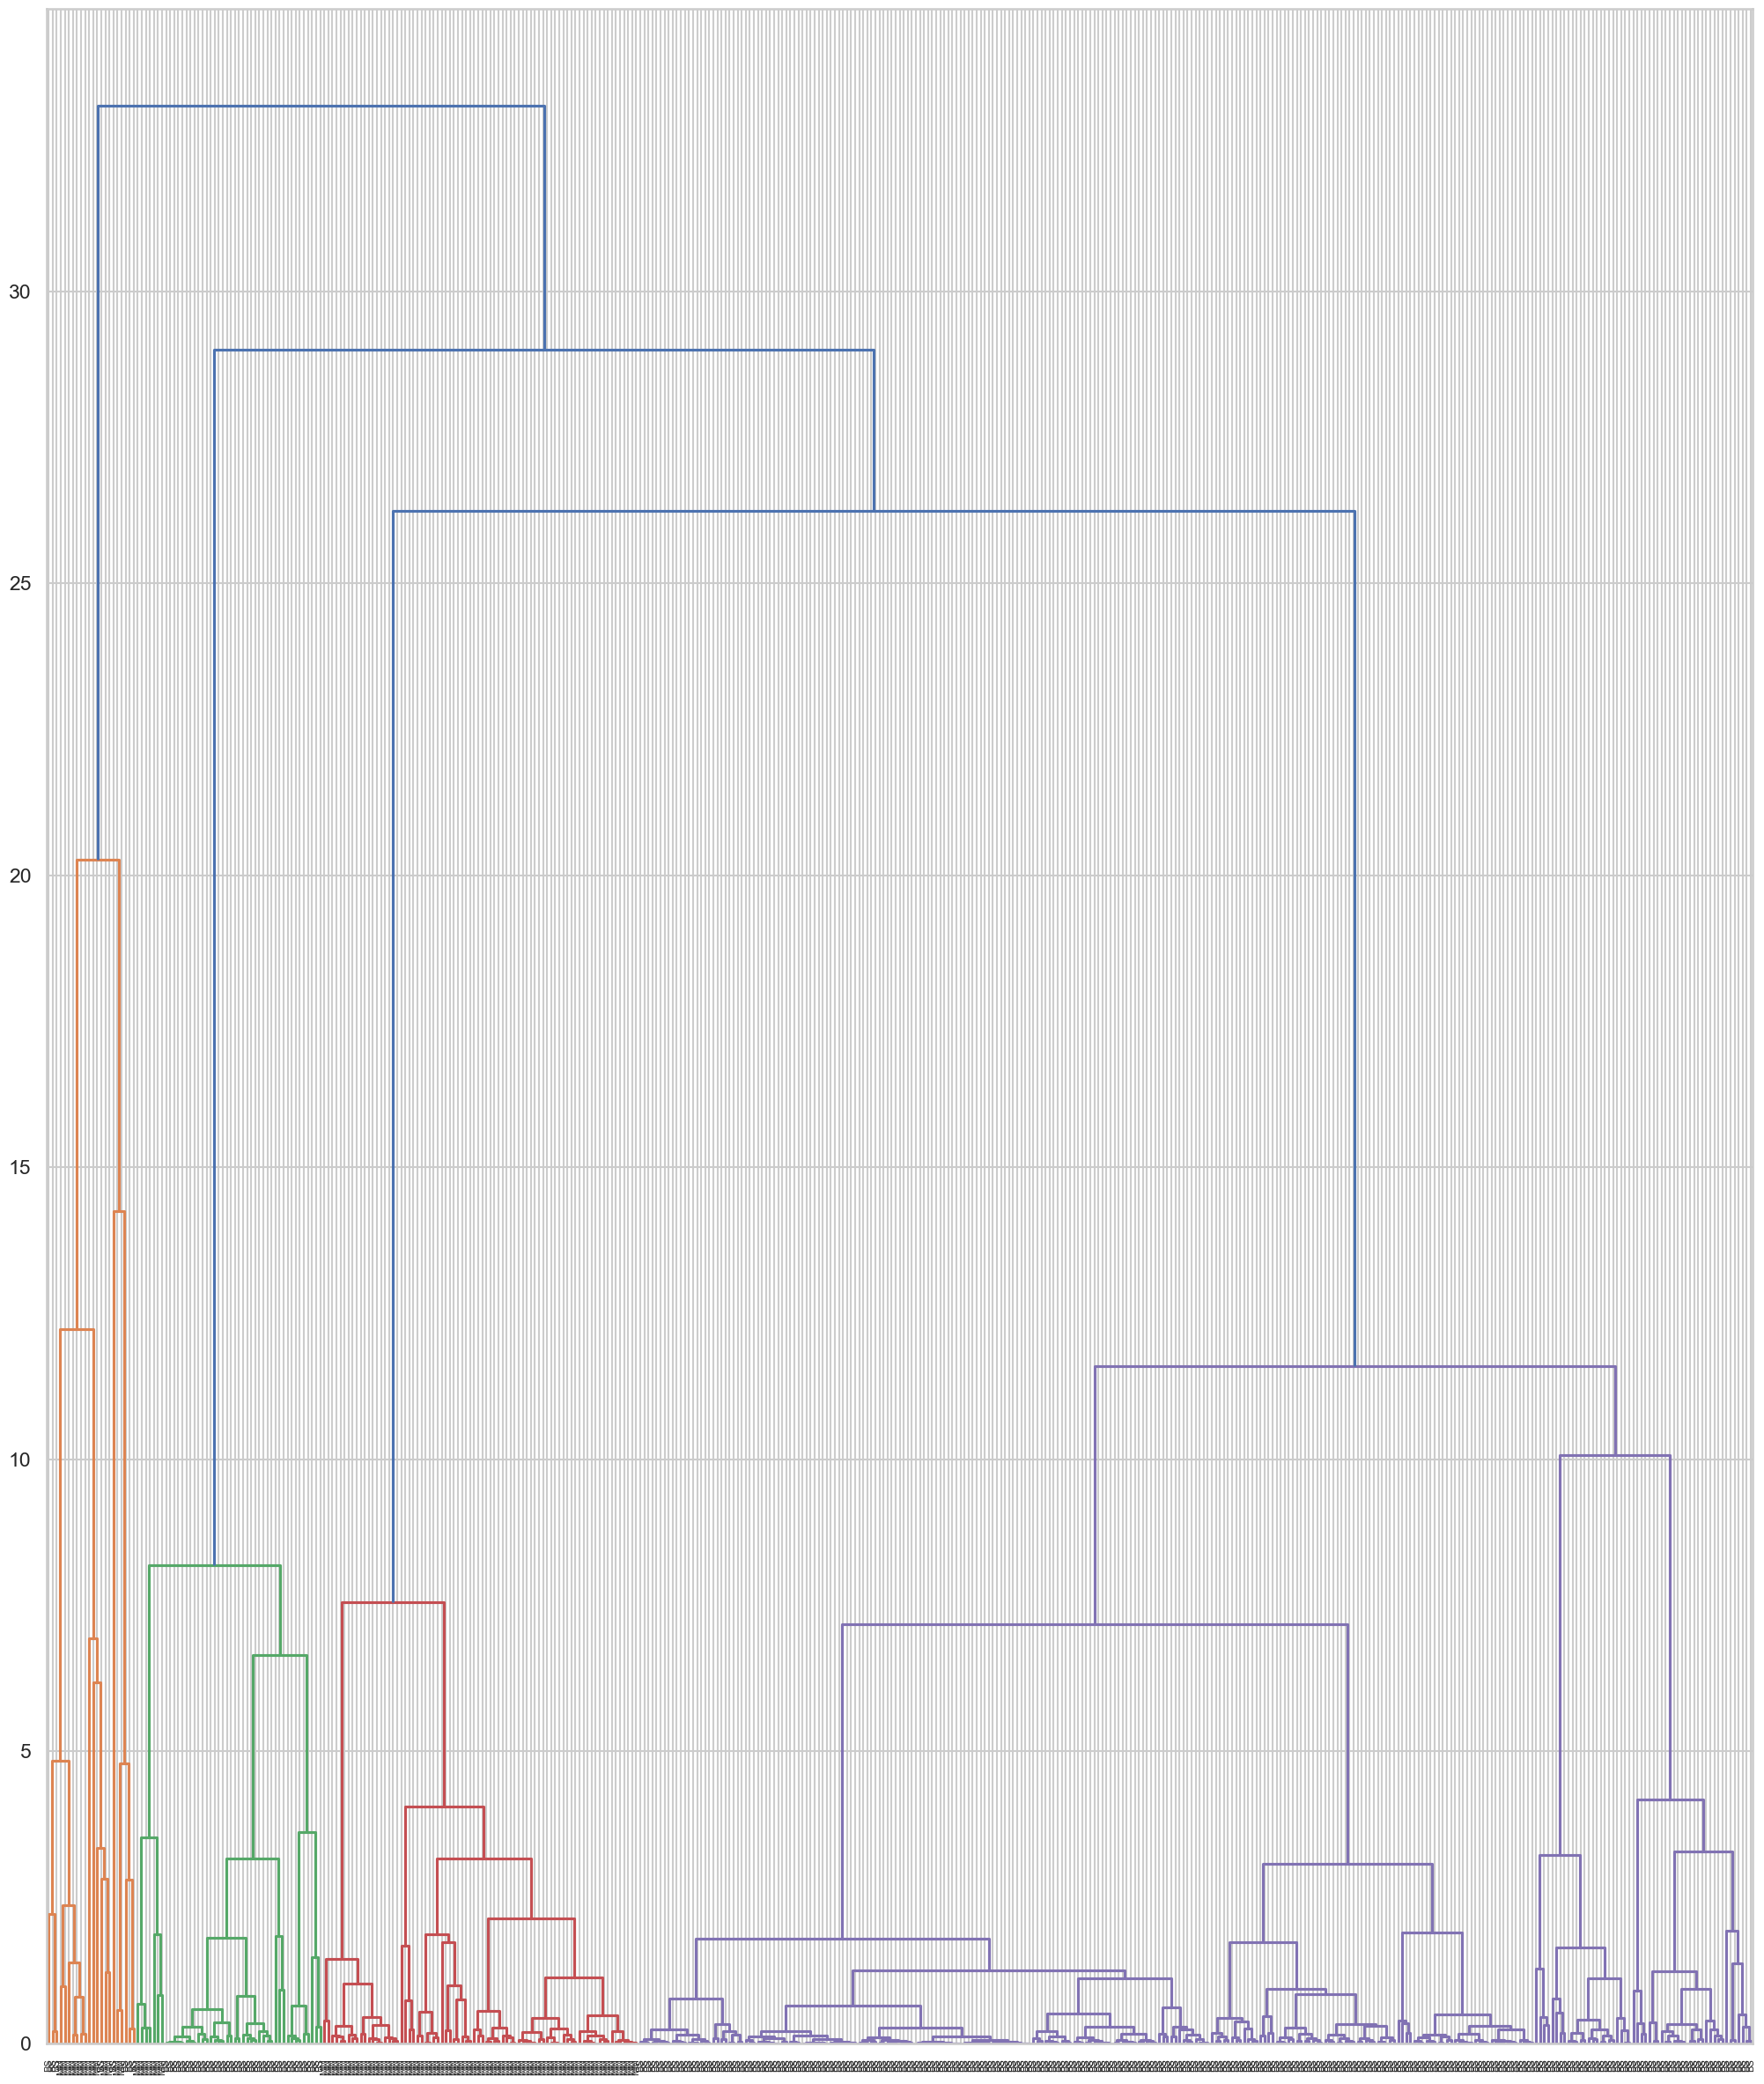

In [19]:
linkage_type = 'ward'
cluster_new = cluster_data.iloc[:, 6:]
linkage_matrix = linkage(cluster_new, linkage_type)

plt.figure(figsize=(25,30))
labels = list(cluster_data['acct_type'])

# plot using 'dendrogram()'
dendrogram(linkage_matrix, labels=labels,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.)

plt.show()

In [31]:
#Run Clustering
model = AgglomerativeClustering(n_clusters = 3)
model.fit(cluster_new)

AgglomerativeClustering(n_clusters=3)

In [21]:
#Adding cluster column from output of model
clustering_model = AgglomerativeClustering(n_clusters=3, linkage="ward")
cluster_new = cluster_data.iloc[:, 6:]

clustering_model.fit(cluster_new)
label = clustering_model.labels_
print(label)

cluster_data['cluster'] = label
cluster_data.dropna(inplace = True)
cluster_data.head()

[0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 2 0 0 0 0 0 0 0 2 0 0 1 0 0 0 1 0 2 0 2 2 0 0 2 0 2 0 0 0 1 0 0 0
 2 0 0 0 0 1 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 2 0 1 0 0 0 0 0 2 0 0 0 0 0 0 1 2 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 2 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 2 0 0 0 0 2 0 0 0 2 0 0 1 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 1 0 0
 0 0 0 0 2 1 0 0 0 0 2 0 1 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 1 0 0 2 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


,acct_type,minimum_balance,starting_balance,ending_balance,saving_amt,account_active,minimum_balance_scaled,starting_balance_scaled,ending_balance_scaled,saving_amt_scaled,account_active_scaled,cluster
0,BS,100,113.04,122.54,9.50,1,-0.554485,-0.447081,-0.553308,-0.349709,0.350238,0
1,MM,500,651.73,12.89,-638.84,0,1.803476,-0.130614,-0.606738,-0.955130,-2.855201,2
2,BS,100,250.24,254.02,3.78,1,-0.554485,-0.366479,-0.489242,-0.355050,0.350238,0
3,BS,100,600.26,609.33,9.07,1,-0.554485,-0.160851,-0.316109,-0.350110,0.350238,0
4,BS,100,2011.02,2901.35,890.33,0,-0.554485,0.667935,0.800730,0.472812,-2.855201,2


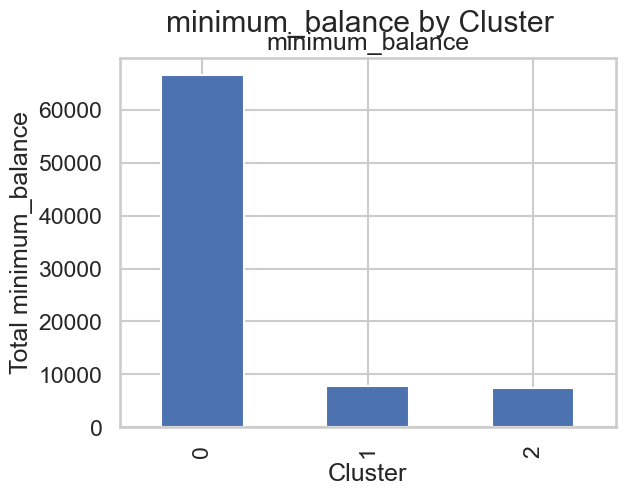

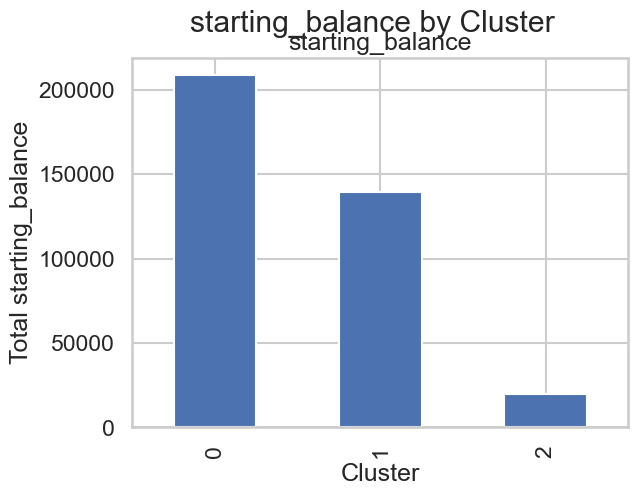

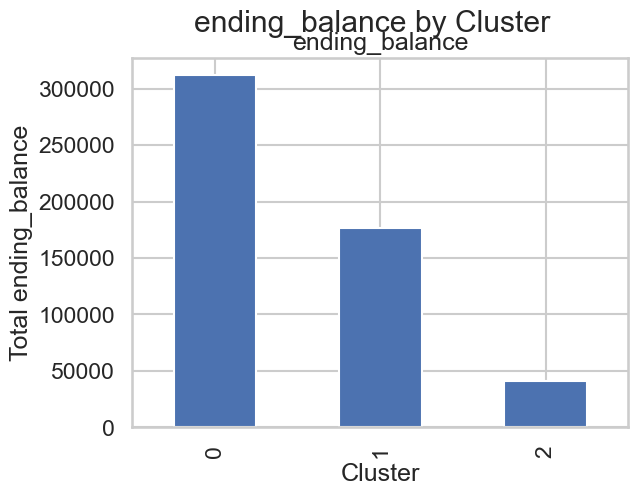

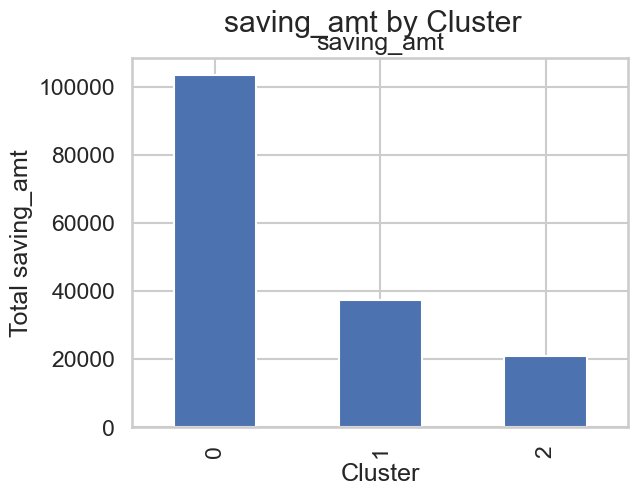

In [23]:
# Visualize the results by total
features = list(cluster_data.columns)[1:5]
for x in features:
  plt.figure()
  cluster_data.groupby(["cluster"])[x].sum().plot(kind="bar", title= x + ' by Cluster', ylabel='Total ' + x , xlabel='Cluster', figsize=(10, 6), subplots=True)
  plt.show()

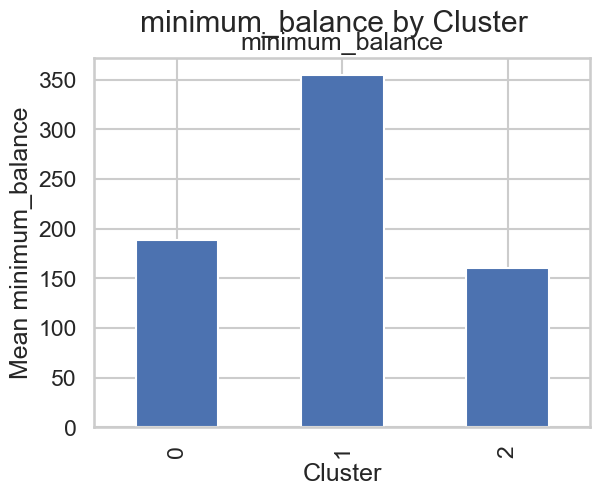

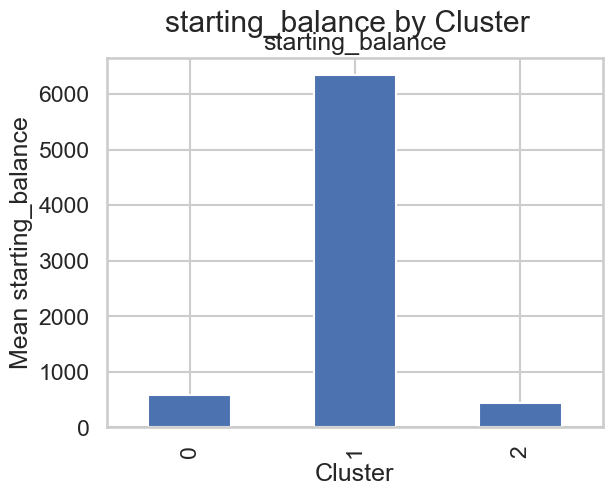

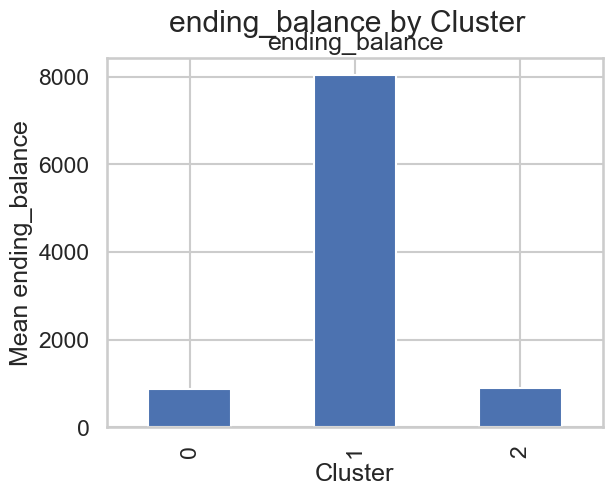

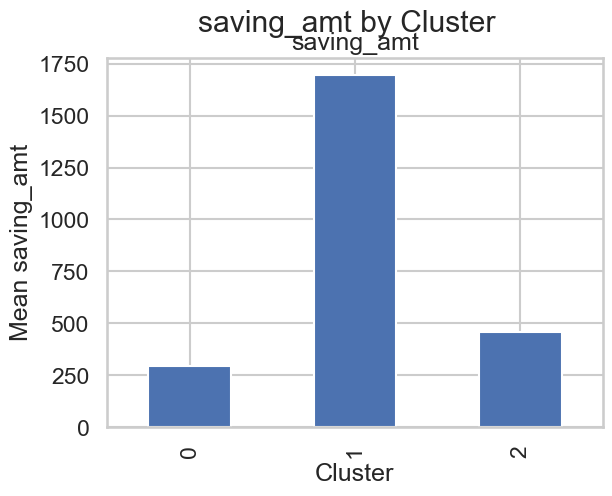

In [25]:
# Visualize the results by mean
features = list(cluster_data.columns)[1:5]
for x in features:
  plt.figure()
  cluster_data.groupby(["cluster"])[x].mean().plot(kind="bar", title= x + ' by Cluster', ylabel='Mean ' + x , xlabel='Cluster', figsize=(10, 6), subplots=True)
  plt.show()

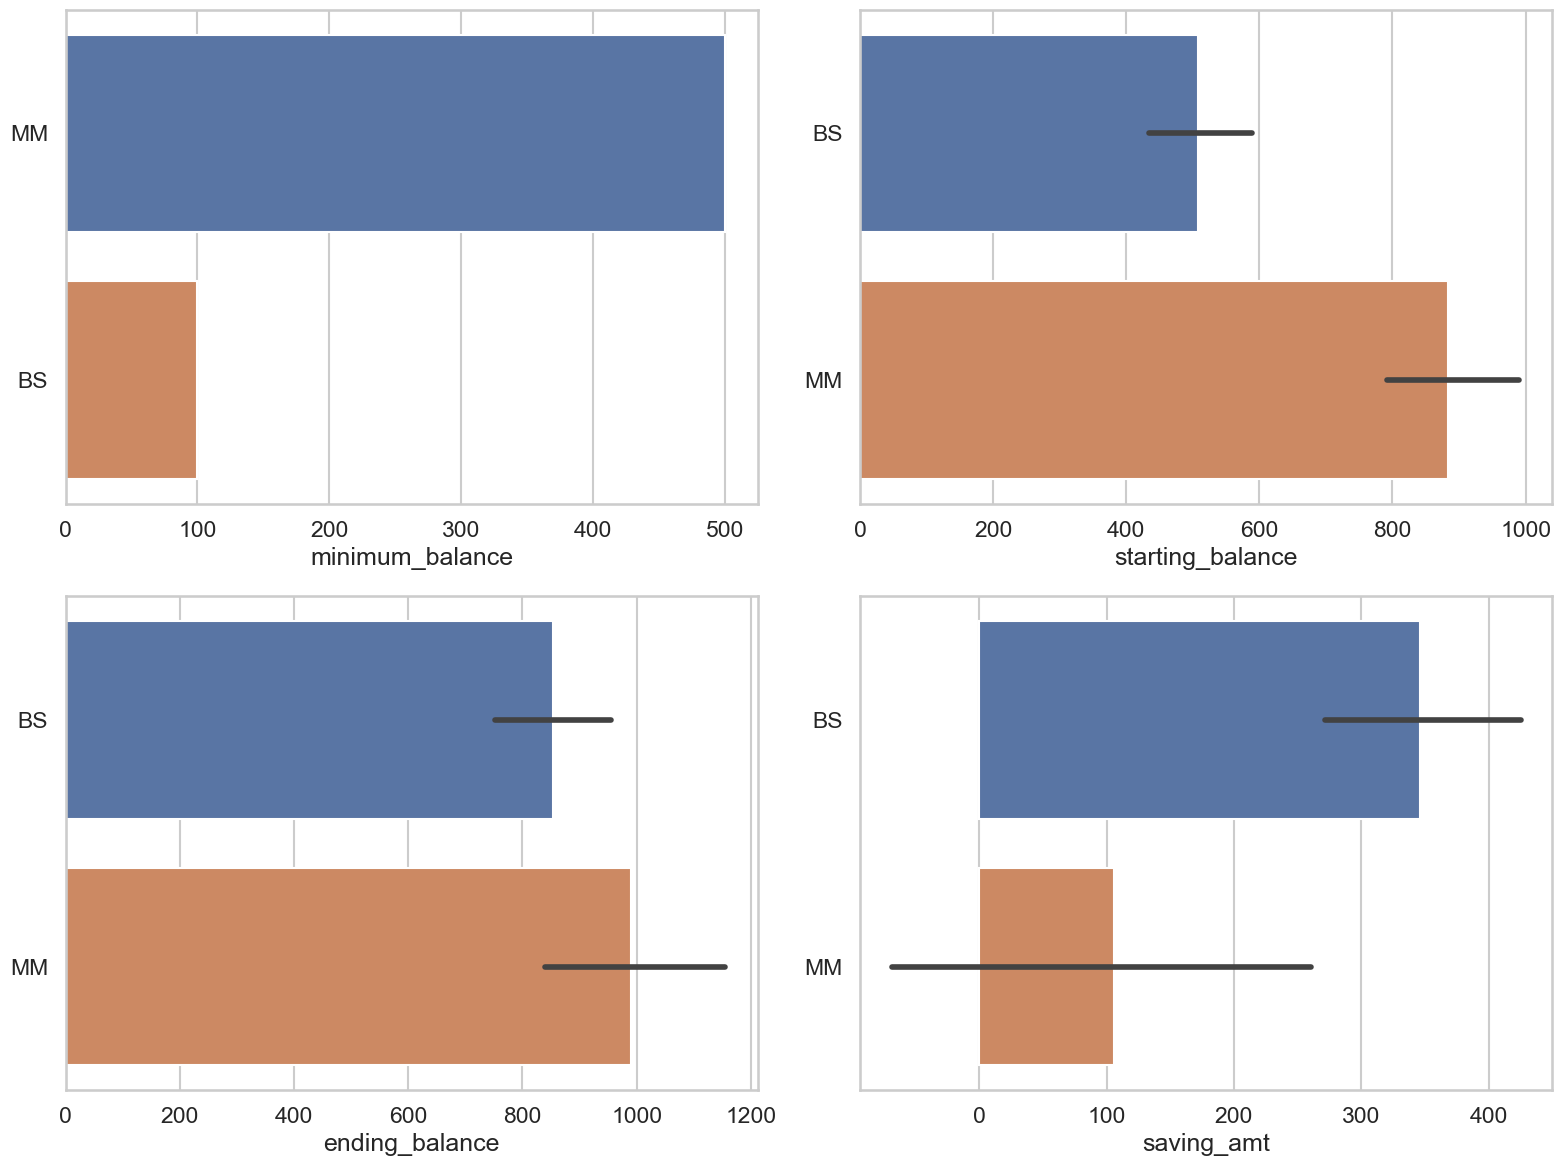

In [35]:
# Cluster 0
cluster0 = cluster_data[cluster_data['cluster'] == 0.0]
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
import seaborn as sns
sns.set(style='whitegrid', context='talk')
for i in range(2):
    for j in range(2):
        cluster2 = cluster0.sort_values(by=features[i*2 + j], ascending=False)
        sns.barplot(y = 'acct_type', x=features[i*2 + j], data=cluster2, ax=axs[i, j])
        axs[i, j].set_ylabel('')

fig.tight_layout()

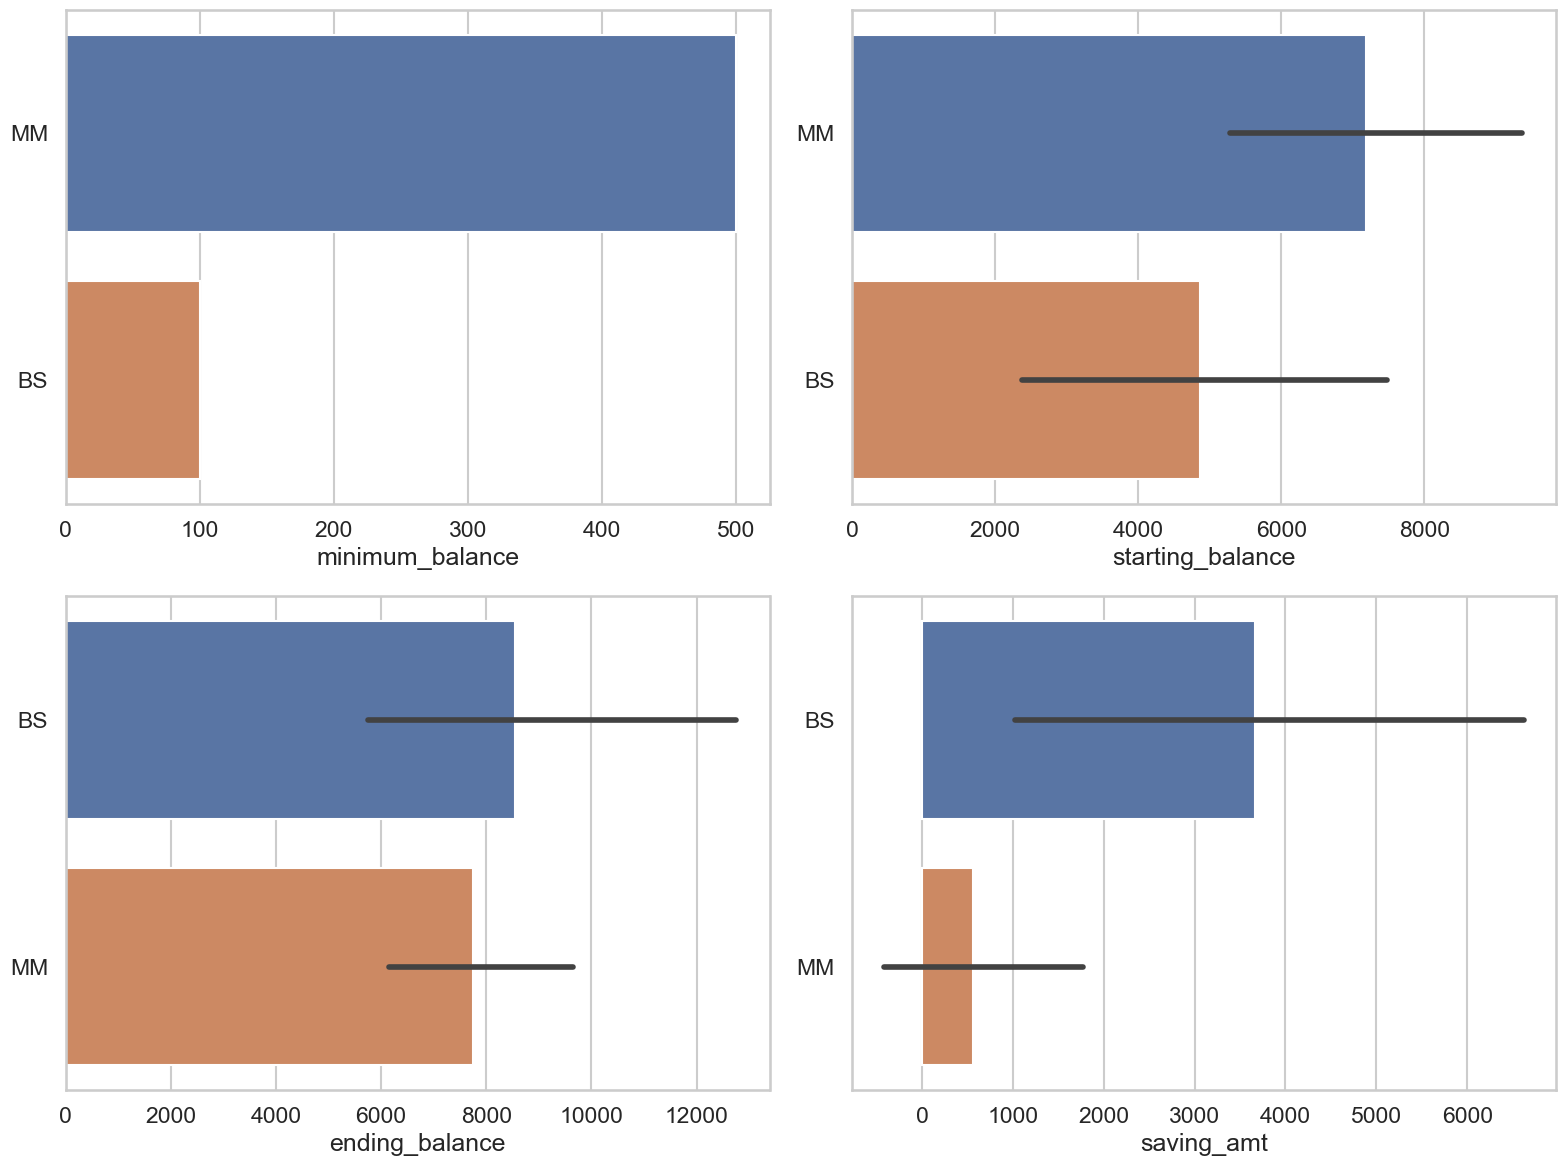

In [36]:
# Cluster 1
cluster1 = cluster_data[cluster_data['cluster'] == 1.0]
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
import seaborn as sns
sns.set(style='whitegrid', context='talk')
for i in range(2):
    for j in range(2):
        cluster2 = cluster1.sort_values(by=features[i*2 + j], ascending=False)
        sns.barplot(y = 'acct_type', x=features[i*2 + j], data=cluster2, ax=axs[i, j])
        axs[i, j].set_ylabel('')

fig.tight_layout()

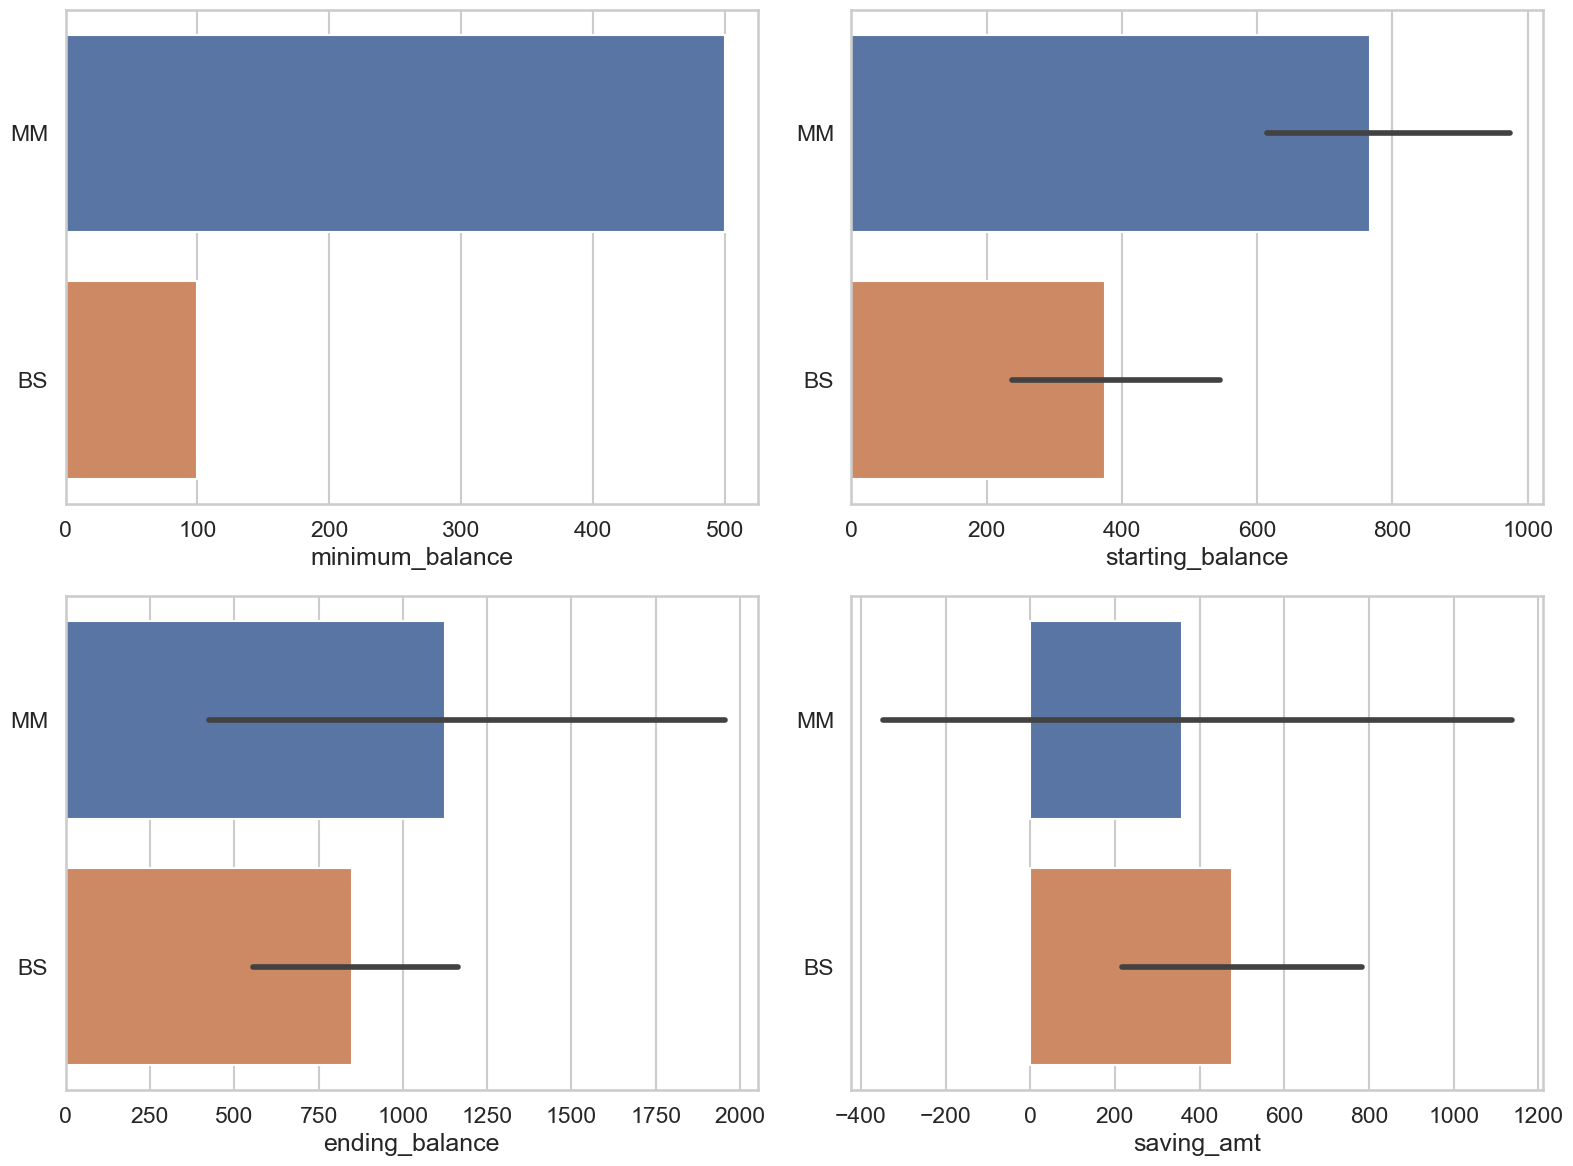

In [33]:
# Cluster 2
cluster2 = cluster_data[cluster_data['cluster'] == 2.0]
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
import seaborn as sns
sns.set(style='whitegrid', context='talk')
for i in range(2):
    for j in range(2):
        cluster3 = cluster2.sort_values(by=features[i*2 + j], ascending=False)
        #clustertop = cluster2.head()
        sns.barplot(y = 'acct_type', x=features[i*2 + j], data=cluster2, ax=axs[i, j])
        axs[i, j].set_ylabel('')

fig.tight_layout()

In [92]:
from sklearn.preprocessing import MinMaxScaler
min_max_scale = MinMaxScaler()

In [89]:
saving_radar = cluster_data[['cluster','account_active','minimum_balance','starting_balance','ending_balance','saving_amt']]

In [90]:
saving_radar

,cluster,account_active,minimum_balance,starting_balance,ending_balance,saving_amt
0,0,1,100,113.04,122.54,9.50
1,2,0,500,651.73,12.89,-638.84
2,0,1,100,250.24,254.02,3.78
3,0,1,100,600.26,609.33,9.07
4,2,0,100,2011.02,2901.35,890.33
...,...,...,...,...,...,...
416,0,1,100,177.33,528.57,351.24
417,0,1,100,333.53,508.26,174.73
418,0,1,100,662.06,873.14,211.08
419,0,1,100,169.96,96.25,-73.71


In [165]:
col = ['account_active', 'minimum_balance', 'starting_balance', 'ending_balance', 'saving_amt']
col_scale = ['account_active_scaled','minimum_balance_scaled', 'starting_balance_scaled', 'ending_balance_scaled','saving_amt_scaled']
saving_radar[col_scale] = min_max_scale.fit_transform(saving_radar[col])
saving_radar

,cluster,account_active,minimum_balance,starting_balance,ending_balance,saving_amt,account_active_scaled,minimum_balance_scaled,starting_balance_scaled,ending_balance_scaled,saving_amt_scaled
0,0,1.0,188.385269,590.869292,883.668612,292.799320,1.0,0.142071,0.026541,0.000000,0.000000
1,1,1.0,354.545455,6337.750000,8031.180909,1693.430909,1.0,1.000000,1.000000,1.000000,1.000000
2,2,0.0,160.869565,434.180435,891.795000,457.614565,0.0,0.000000,0.000000,0.001137,0.117672


In [97]:
saving_radar = saving_radar.groupby(['cluster']).mean().reset_index()
saving_radar

,cluster,account_active,minimum_balance,starting_balance,ending_balance,saving_amt,account_active_scaled,minimum_balance_scaled,starting_balance_scaled,ending_balance_scaled,saving_amt_scaled
0,0,1.0,188.385269,590.869292,883.668612,292.799320,1.0,0.220963,0.028520,0.039275,0.200137
1,1,1.0,354.545455,6337.750000,8031.180909,1693.430909,1.0,0.636364,0.362579,0.357933,0.303994
2,2,0.0,160.869565,434.180435,891.795000,457.614565,0.0,0.152174,0.019412,0.039637,0.212358


In [166]:
import plotly.graph_objects as go
def plot_radar(data):
    fig = go.Figure()
    num_cluster = saving_radar['cluster'].max() + 1
    categories = list(saving_radar.columns)[1:6]
    
    for i in range(num_cluster):
        r = saving_radar.iloc[i,6:].values
        fig.add_trace(go.Scatterpolar(
            r = r,
            theta = categories,
            fill = 'toself',
            name = f'Cluster: {i}',
            opacity = 0.5
        ))
    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True)),showlegend=True)
    fig.show()

[1.         0.22096317 0.02851969 0.0392745  0.20013683]
[1.         0.63636364 0.3625789  0.35793253 0.3039941 ]
[0.         0.15217391 0.01941155 0.0396368  0.21235793]


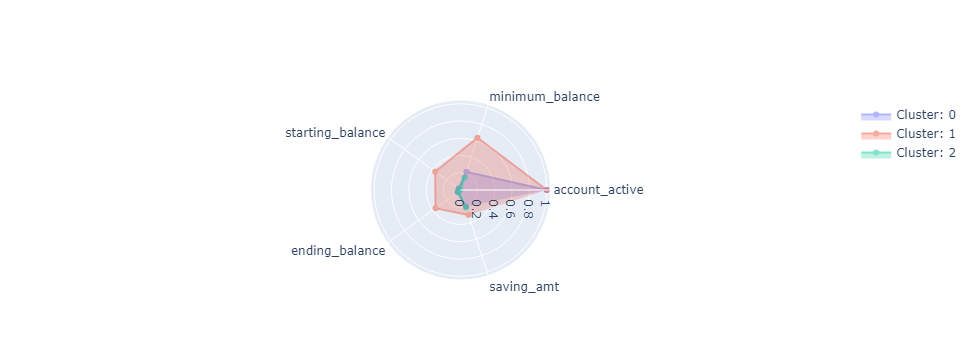

In [160]:
plot_radar(saving_radar)

In [ ]:
list(saving_radar.columns)[1:6]

['account_active',
 'minimum_balance',
 'starting_balance',
 'ending_balance',
 'saving_amt']

In [ ]:
saving_radar['cluster'].max() + 1

3